In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [8]:
# Inspect columns related to job satisfaction and remote work
job_sat_columns = [col for col in df.columns if 'JobSat' in col]
print("\nJob Satisfaction related columns:")
print(job_sat_columns)

# Check for any columns that might relate to remote work
remote_work_columns = [col for col in df.columns if 'Remote' in col]
print("\nColumns related to remote work:")
print(remote_work_columns)



Job Satisfaction related columns:
['JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11']

Columns related to remote work:
[]


In [9]:
# Drop rows where any of the critical columns (Employment, JobSatPoints_5) have missing values
df.dropna(subset=['Employment', 'JobSatPoints_5'], inplace=True)

# Verify that missing values are dropped
missing_values_after = df[['Employment', 'JobSatPoints_5']].isnull().sum()
print("\nMissing values after dropping rows with missing values:\n", missing_values_after)

# Optionally, display the first few rows to confirm the changes
print("\nFirst few rows after dropping missing data:")
print(df.head())



Missing values after dropping rows with missing values:
 Employment        0
JobSatPoints_5    0
dtype: int64

First few rows after dropping missing data:
    ResponseId                                         MainBranch  \
1            2                     I am a developer by profession   
10          11  I used to be a developer by profession, but no...   
12          13                     I am a developer by profession   
15          16                     I am a developer by profession   
18          19                     I am a developer by profession   

                Age           Employment   Check  \
1   35-44 years old  Employed, full-time  Apples   
10  35-44 years old  Employed, full-time  Apples   
12  35-44 years old  Employed, full-time  Apples   
15  45-54 years old  Employed, full-time  Apples   
18  25-34 years old  Employed, full-time  Apples   

                                     CodingActivities  \
1   Hobby;Contribute to open-source projects;Other...   
10

In [12]:

# Calculate the median job satisfaction for each experience range
# Set observed=True to avoid the warning and ensure correct behavior
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSatPoints_5'].median()


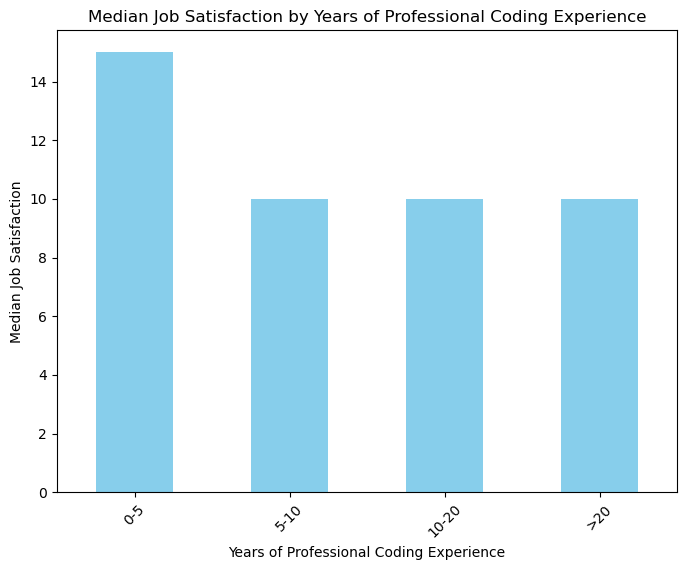


Updated Median Job Satisfaction by Experience Range:
ExperienceRange
0-5      15.0
5-10     10.0
10-20    10.0
>20      10.0
Name: JobSatPoints_5, dtype: float64


In [15]:
# Replace 0.0 in 'JobSatPoints_5' with NaN
df['JobSatPoints_5'] = df['JobSatPoints_5'].replace(0.0, float('NaN'))

# Recalculate the median job satisfaction for each experience range
median_job_sat = df.groupby('ExperienceRange', observed=True)['JobSatPoints_5'].median()

# Plotting the relationship again after handling 0.0 values
plt.figure(figsize=(8, 6))
median_job_sat.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

# Print the updated median job satisfaction by experience range
print("\nUpdated Median Job Satisfaction by Experience Range:")
print(median_job_sat)


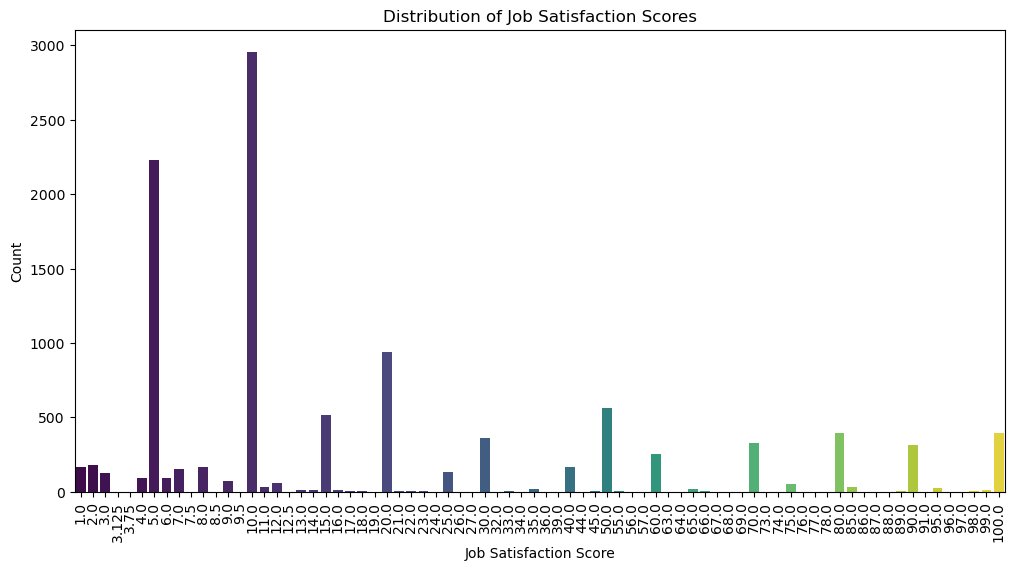

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize the distribution of 'JobSatPoints_5' with adjusted x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(x='JobSatPoints_5', data=df, palette='viridis', hue='JobSatPoints_5', legend=False)
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels to make them more readable
plt.show()


In [38]:
[col for col in df.columns if 'country' in col.lower()]


['Country']

In [39]:
# Drop NaN values
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split and explode
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

# Remove leading/trailing whitespace
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()


In [40]:
lang_counts = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')


In [41]:
# Top 10 countries
top_countries = lang_counts['Country'].value_counts().nlargest(10).index
filtered_data = lang_counts[lang_counts['Country'].isin(top_countries)]


In [42]:
pivot_data = filtered_data.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)


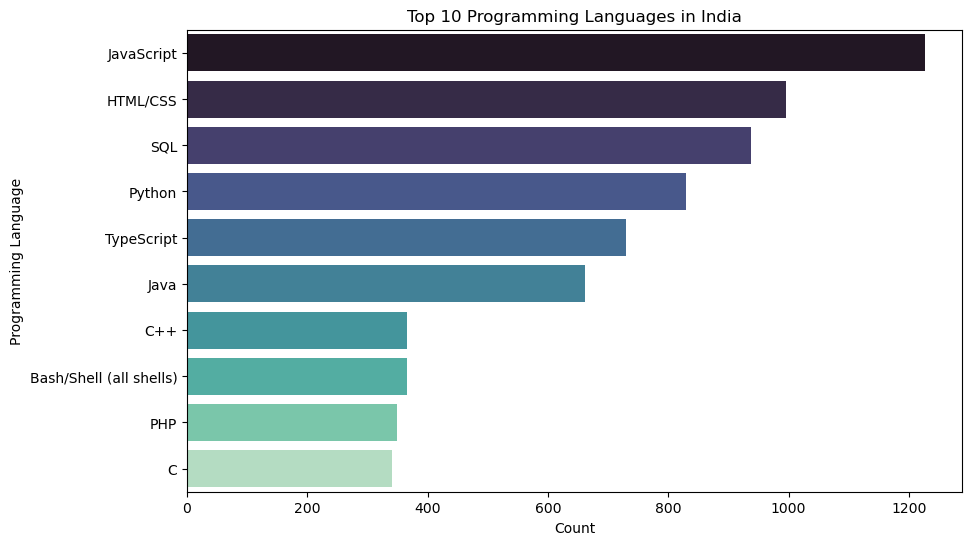

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_langs.values,
    y=top_langs.index,
    hue=top_langs.index,       # assigning hue
    dodge=False,
    palette='mako',
    legend=False               # disables redundant legend
)
plt.title(f'Top 10 Programming Languages in {country}')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()


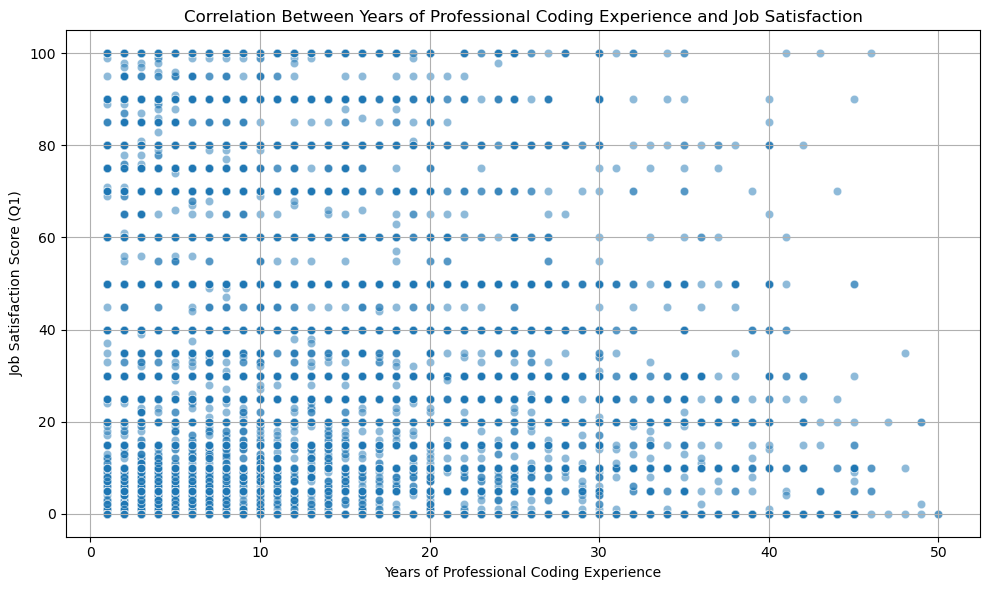

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure both columns are numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
plot_data = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (Q1)')
plt.grid(True)
plt.tight_layout()
plt.show()


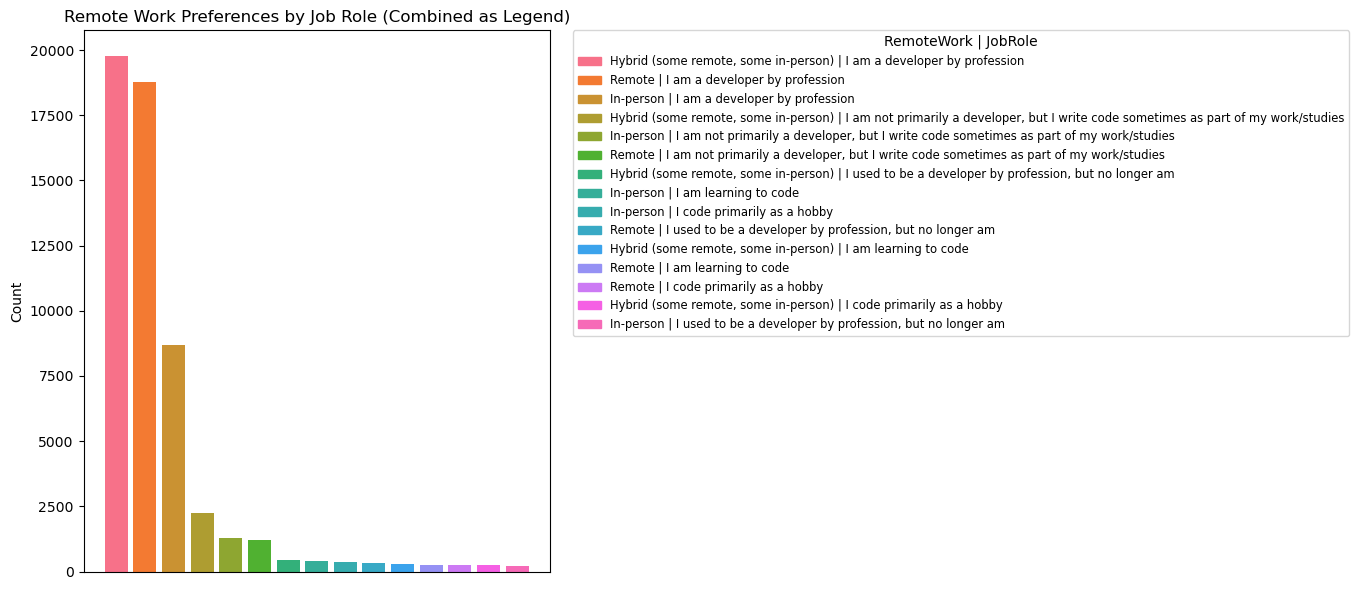

In [72]:
#[6]
# Clean the necessary columns
df = df.dropna(subset=['RemoteWork', 'Employment', 'MainBranch'])

# Create a new combined label column
df['CategoryLabel'] = df['RemoteWork'] + ' | ' + df['MainBranch']

# Count the occurrences of each combination
category_counts = df['CategoryLabel'].value_counts().reset_index()
category_counts.columns = ['CategoryLabel', 'Count']

# Create a color palette
colors = sns.color_palette('husl', len(category_counts))

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(x=range(len(category_counts)), height=category_counts['Count'], color=colors)

# Hide x-axis labels
plt.xticks([], [])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Remote Work Preferences by Job Role (Combined as Legend)')

# Add custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(category_counts))]
plt.legend(handles, category_counts['CategoryLabel'], title='RemoteWork | JobRole', 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')

plt.tight_layout()
plt.show()

In [84]:
# Drop missing values for 'EdLevel' and 'Employment'
df = df.dropna(subset=['EdLevel', 'Employment'])

# Create a cross-tabulation of Education Level vs Employment Type
crosstab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True, margins_name="Total")

# Print the cross-tabulation
print(crosstab)

# Visualization: Plot the cross-tabulation data using a stacked bar plot
# Normalize the data to show proportions
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1058   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16804   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11006   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2072   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      376   
Total                                                             36515   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                        

<Figure size 1600x800 with 0 Axes>

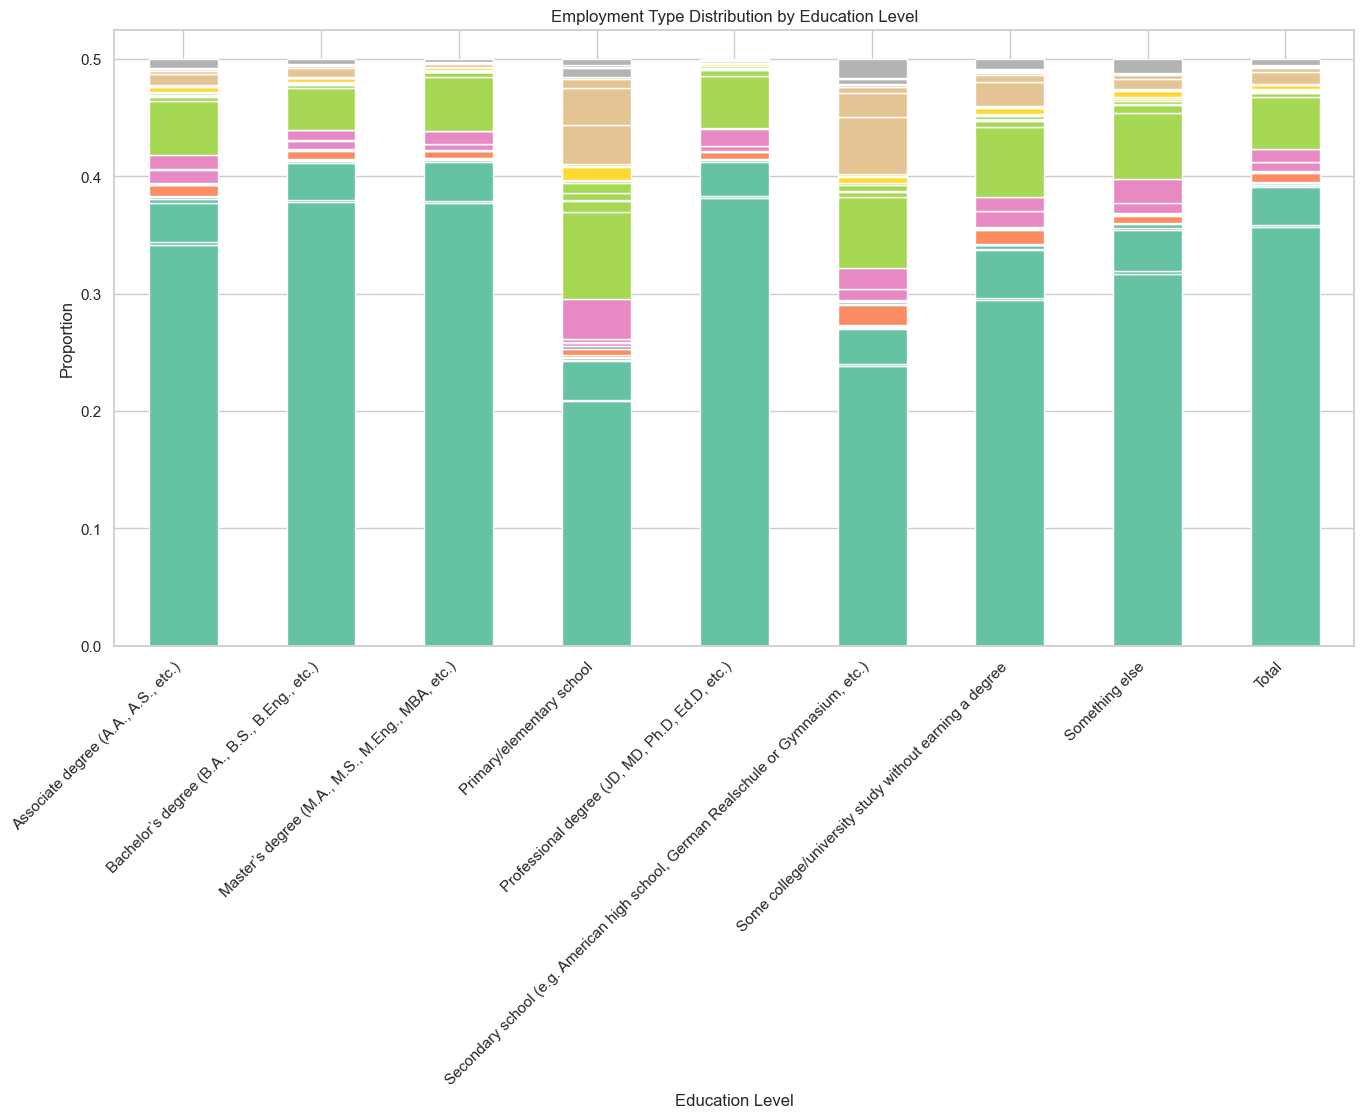

In [86]:

# Create a larger figure with constrained layout
plt.figure(figsize=(16, 8), constrained_layout=True)

# Plot the normalized crosstab as a stacked bar plot without legend
crosstab_normalized.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Set2', legend=False)

# Titles and labels
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [88]:
# Save the cleaned and modified dataset to a new CSV file
output_file = 'modified_survey_data.csv'
df.to_csv(output_file, index=False)

# Confirm that the file has been saved
print(f"Dataset saved as {output_file}")


Dataset saved as modified_survey_data.csv
